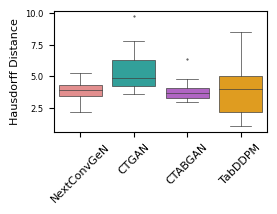

In [20]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the matplotlib to display plots inline
%matplotlib inline

# Define custom colors
custom_palette = ["lightcoral", "lightseagreen", "mediumorchid", "orange", "burlywood", "cornflowerblue"]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()
flierprops =dict(marker='o', markersize=0.5, linestyle='none')

# Iterate over each subfolder
for folder in ['t1', 't2', 't3', 't4', 't5']:
    # Get the path to the CSV file
    csv_file = os.path.join(folder, 'supervisedCombined_report.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Concatenate the DataFrame with the combined data
    combined_data = pd.concat([combined_data, df[~(df["Model"].isin(["convexCTGAN", "convexCTABGAN", "TVAE"]))]], ignore_index=True)

width_inches = 7/ 2.54
height_inches = 4 / 2.54

# Create a box plot for each model with custom colors
plt.figure(figsize=(width_inches, height_inches))
sns.boxplot(data=combined_data, x='Model', y="HausdorffDistance", palette=custom_palette, linewidth=0.5, flierprops=flierprops)
#plt.title('Box Plot of F1 Scores for Different Models')
plt.xlabel('', fontsize=8)
plt.ylabel('Hausdorff Distance', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=6)
plt.grid(False)
plt.savefig('HausdorffDistance.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
